Industrial production of electric and gas utilities in the United States, from the years 1985–2018

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data = pd.read_csv('AutoArima-Time-Series-Blog-master/Electric_Production.csv')
print('Data Shape : ',data.shape)

Data Shape :  (397, 2)


In [30]:
data.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [31]:
data.index = pd.to_datetime(data.DATE)
data.pop('DATE')
data.head()


,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [32]:
data.columns = ['Value']
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [84]:
data.Value.isnull().sum()

0

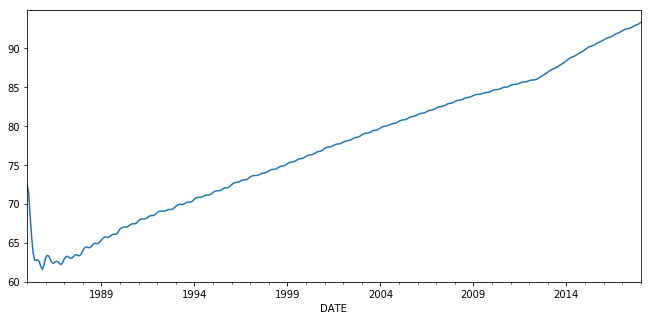

In [89]:
rcParams['figure.figsize'] = 11, 5
data['Value'].rolling('10000D').mean().plot()

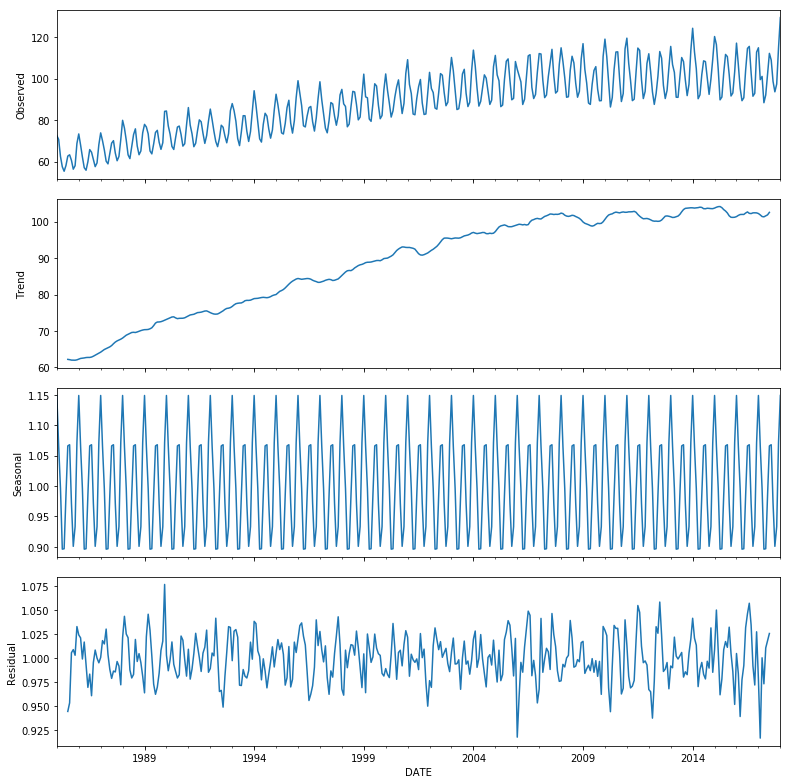

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 11
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative').plot()
plt.show()

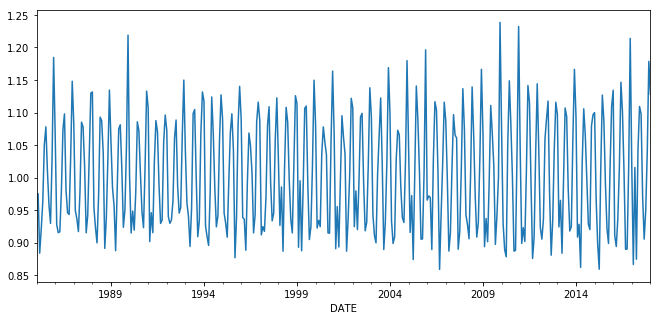

In [50]:
data['change'] = data.Value.div(data.Value.shift())
rcParams['figure.figsize'] = 11, 5
data.change.plot()

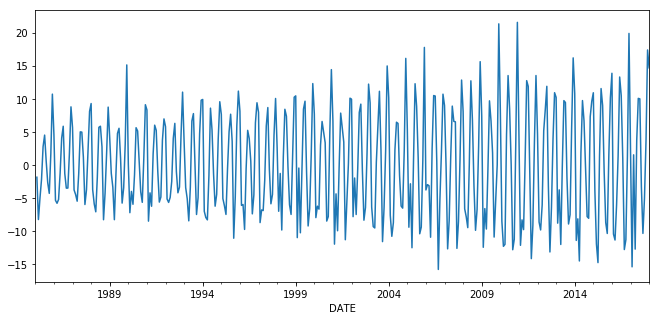

In [55]:
data.Value.sub(data.Value.shift()).plot()

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/home/siddhesh/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


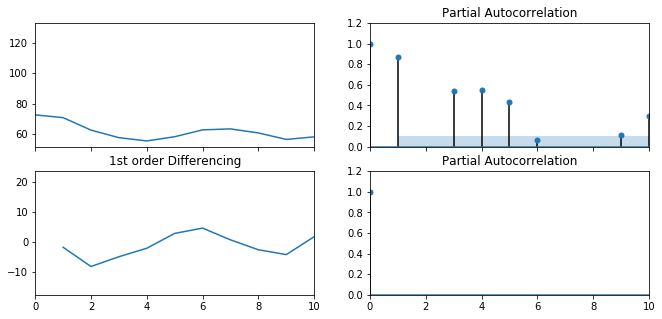

In [67]:
fig , axes = plt.subplots(2,2,sharex=True)
axes[0][0].plot(data.Value.values)
axes[0][1].set_title('Zero order Differencing')
axes[0][1].set(ylim=(0,1.2))
axes[0][1].set(xlim=(0,10))
a = plot_pacf(data.Value.values,ax=axes[0][1])
axes[1][0].set_title('1st order Differencing')
axes[1][0].plot(data.Value.diff().values)
axes[1][1].set(ylim=(0,1.2))
axes[1][1].set(xlim=(0,10))
a = plot_pacf(data.Value.diff().values,ax=axes[1][1])

plt.show()

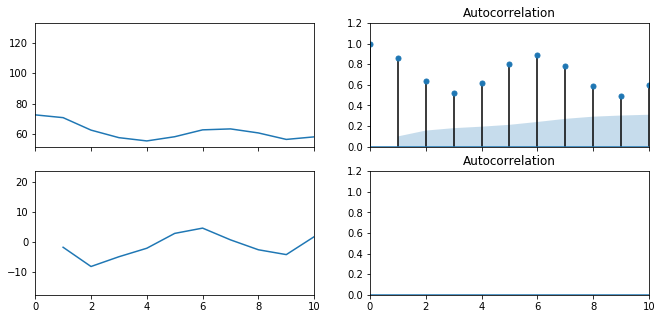

In [74]:
fig , axes = plt.subplots(2,2,sharex=True)
axes[0][0].plot(data.Value.values)
axes[0][1].set(ylim=(0,1.2))
axes[0][1].set(xlim=(0,10))
a = plot_acf(data.Value.values,ax=axes[0][1])
axes[1][0].plot(data.Value.diff().values)
axes[1][1].set(ylim=(0,1.2))
axes[1][1].set(xlim=(0,10))
a = plot_acf(data.Value.diff().values,ax=axes[1][1])

plt.show()

In [75]:
from statsmodels.tsa.arima_model import ARIMA

In [77]:
train , test  = data.Value[:300]  , data.Value[300:]

In [78]:
model = ARIMA(train , order=(3,1,2))
fitted = model.fit(disp=-1)

/home/siddhesh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/siddhesh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/siddhesh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/siddhesh/.local/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [82]:
# Forecast
fc, se, conf = fitted.forecast(97, alpha=0.5)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


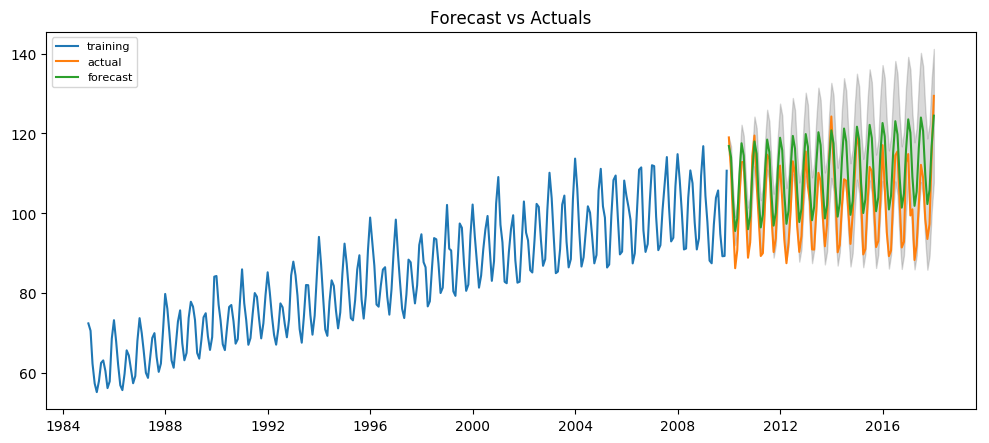

In [83]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()